In [1]:
import Example2_code as ep

The below code is a modification of the example provided by:\
https://analyticsindiamag.com/perceptron-is-the-only-neural-network-without-any-hidden-layer/

Now we load a dataset to perform the algorithm on, we load the data in the form:

$$X_i = [x_i\text{-cordinate}, y_i\text{-cordinate},\text{property} ],\quad \vec y = (y_1,y_2,\dots)-\text{target}$$

We Load the common Iris dataset, clean it to enable linear fitting, and plot it using the 'scatter' method

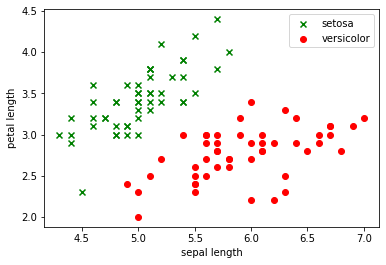

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [2]:
ep.load_data_set(show = True)

Performing the algorithm

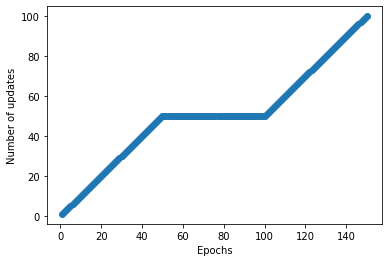

In [3]:
import Example2_code as ep
per = ep.Perceptron(learning_rate=0.1, n_iter=100, random_state=1)

per.compute()

Now let us see the plot for the data (Still work in process so its wrong ... for now)

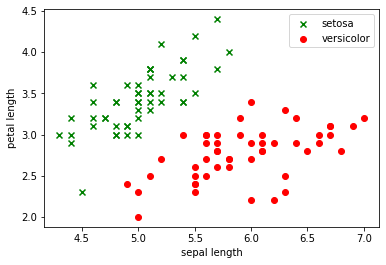

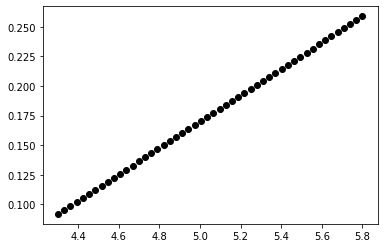

In [4]:
ep.load_data_set(show = False, line = True, weights = per.weights[1:] )

In [5]:
#https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron

import numpy as np
#from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

X = np.array([[2,1],[3,4],[4,2],[3,1]])
Y = np.array([0,0,1,1])
h = .02  # step size in the mesh


# we create an instance of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors

clf = Perceptron(learning_rate=0.1, n_iter=100, random_state=1)
clf.fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

ax.set_title('Perceptron')

NameError: name 'Perceptron' is not defined

In [ ]:
d = p.load_data()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import Perc_code as p



""" Show- true graph, else no grapth"""
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

# return the data and the target
X,y = load_iris(return_X_y=True)

# plt.scatter(x, y,...)

# first fifty enteries

plt.scatter(X[:50, 0], X[:50, 1],color='green', marker='x', label='setosa')

# last thifty entires
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='red', marker='o', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper right')
plt.show()

In [ ]:
print(X)

In [ ]:
print(X[:50,])